In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# raw_dataset = pd.read_csv("/data/fast0/datasets/glathida-3.1.0/data/T.csv")
T_dataset = pd.read_csv("~/data/glac/T.csv")
TT_dataset = pd.read_csv("~/data/glac/TT.csv")


In [2]:
TT_dataset = TT_dataset.drop("POLITICAL_UNIT", axis=1)
TT_dataset = TT_dataset.drop("GLACIER_NAME", axis=1)
TT_dataset = TT_dataset.drop("SURVEY_DATE", axis=1)
TT_dataset = TT_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("MAXIMUM_THICKNESS", axis=1)
TT_dataset = TT_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("DATA_FLAG", axis=1)
TT_dataset = TT_dataset.drop("REMARKS", axis=1)

# TT_dataset = TT_dataset.dropna()
TT_dataset.isna().sum()

GlaThiDa_ID        0
LOWER_BOUND        0
UPPER_BOUND        0
AREA               5
MEAN_SLOPE        12
MEAN_THICKNESS     0
dtype: int64

In [3]:
# T_dataset = T_dataset.drop("GlaThiDa_ID", axis=1)
T_dataset = T_dataset.drop("GLACIER_DB", axis=1)
T_dataset = T_dataset.drop("POLITICAL_UNIT", axis=1)
T_dataset = T_dataset.drop("GLACIER_ID", axis=1)
T_dataset = T_dataset.drop("GLACIER_NAME", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_POINTS", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("TOTAL_LENGTH_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("INTERPOLATION_METHOD", axis=1)
T_dataset = T_dataset.drop("INVESTIGATOR", axis=1)
T_dataset = T_dataset.drop("SPONSORING_AGENCY", axis=1)
T_dataset = T_dataset.drop("ELEVATION_DATE", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD_DETAILS", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD", axis=1)
T_dataset = T_dataset.drop("SURVEY_DATE", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS", axis=1)
T_dataset = T_dataset.drop("AREA", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("MAXIMUM_THICKNESS", axis=1)
T_dataset = T_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("DATA_FLAG", axis=1)
T_dataset = T_dataset.drop("REMARKS", axis=1)
T_dataset = T_dataset.drop("REFERENCES", axis=1)
T_dataset = T_dataset.drop("MEAN_SLOPE", axis=1)

#drop the remaining null pieces from elevation
# T_dataset = T_dataset.dropna()
T_dataset.isna().sum()

GlaThiDa_ID    0
LAT            0
LON            0
dtype: int64

In [4]:
#merge lat and lon data from T into TT
TT_plus = pd.merge(TT_dataset, T_dataset, on=["GlaThiDa_ID"])
TT_plus 

,GlaThiDa_ID,LOWER_BOUND,UPPER_BOUND,AREA,MEAN_SLOPE,MEAN_THICKNESS,LAT,LON
0,97,2250,2270,0.01100,12.0,43,47.480,13.600
1,97,2270,2290,0.01400,15.0,36,47.480,13.600
2,97,2290,2310,0.01500,18.0,29,47.480,13.600
3,97,2310,2330,0.02100,25.0,22,47.480,13.600
4,97,2330,2350,0.03800,18.0,19,47.480,13.600
...,...,...,...,...,...,...,...,...
407,2100,4800,4900,0.55900,23.0,44,39.237,97.755
408,2100,4900,5000,0.54500,26.0,19,39.237,97.755
409,2100,5000,5100,0.37900,24.0,3,39.237,97.755
410,2100,5100,5200,0.01600,32.0,0,39.237,97.755


In [5]:
TT_plus = TT_plus.dropna()
TT_plus

,GlaThiDa_ID,LOWER_BOUND,UPPER_BOUND,AREA,MEAN_SLOPE,MEAN_THICKNESS,LAT,LON
0,97,2250,2270,0.011,12.0,43,47.480,13.600
1,97,2270,2290,0.014,15.0,36,47.480,13.600
2,97,2290,2310,0.015,18.0,29,47.480,13.600
3,97,2310,2330,0.021,25.0,22,47.480,13.600
4,97,2330,2350,0.038,18.0,19,47.480,13.600
...,...,...,...,...,...,...,...,...
406,2100,4700,4800,0.479,21.0,59,39.237,97.755
407,2100,4800,4900,0.559,23.0,44,39.237,97.755
408,2100,4900,5000,0.545,26.0,19,39.237,97.755
409,2100,5000,5100,0.379,24.0,3,39.237,97.755


# 

In [6]:
#split the dataset and reserve some to test what was trained.
train_dataset = TT_plus.sample(frac=0.8, random_state=0)
test_dataset = TT_plus.drop(train_dataset.index)

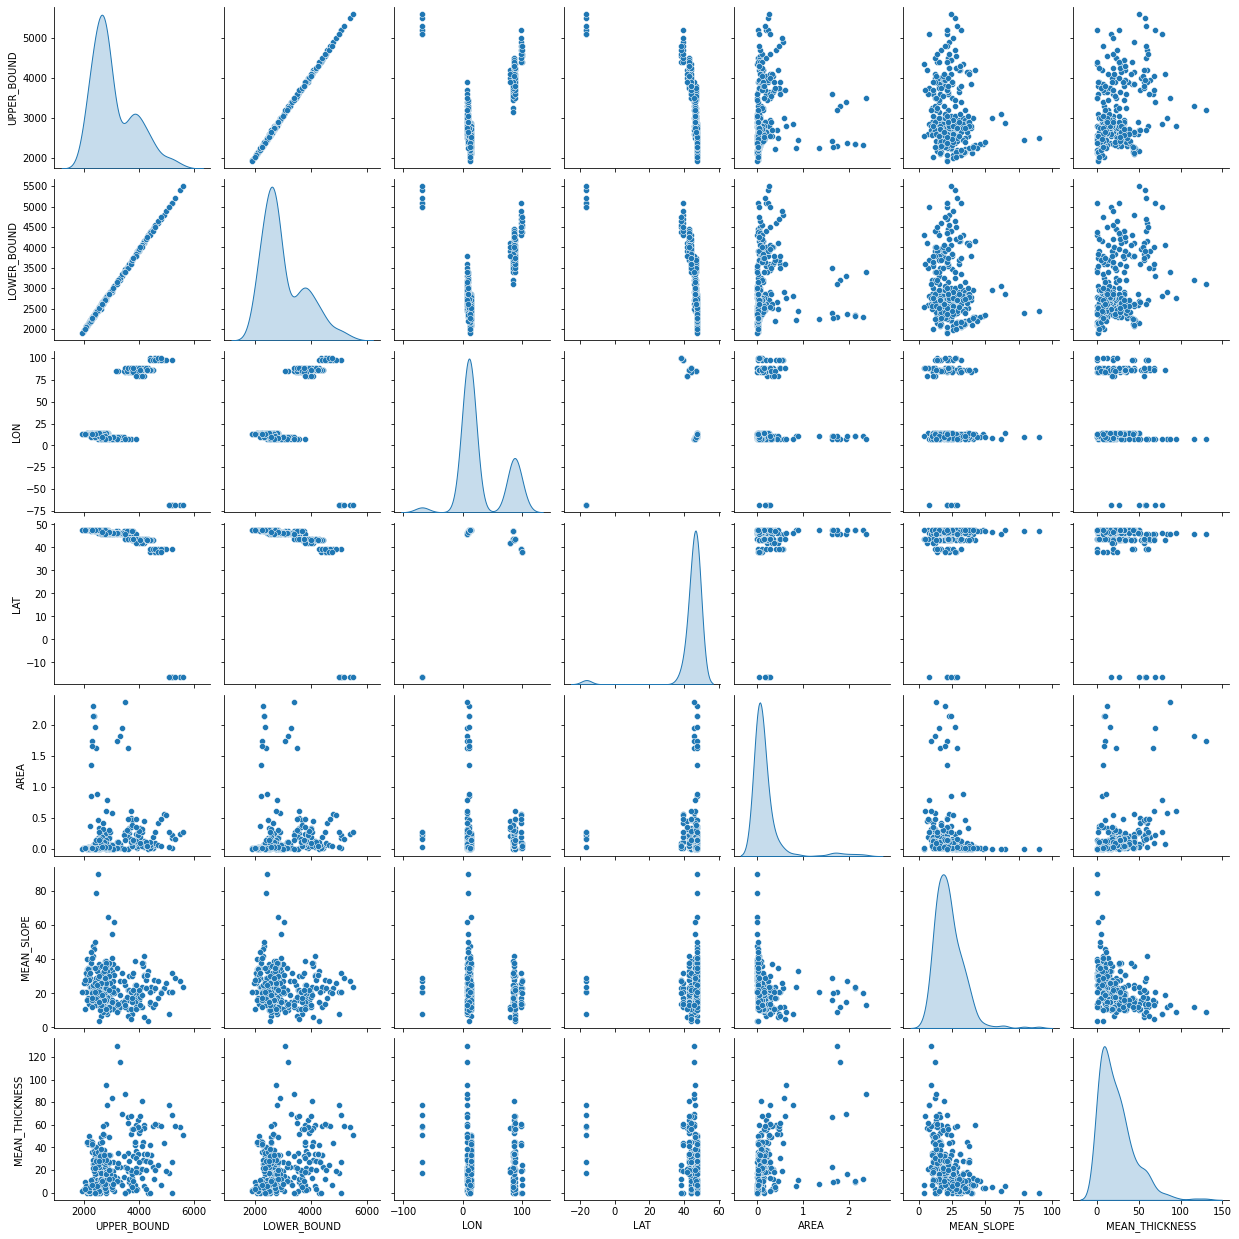

In [7]:
sns.pairplot(train_dataset[["UPPER_BOUND","LOWER_BOUND","LON","LAT","AREA","MEAN_SLOPE","MEAN_THICKNESS"]], diag_kind='kde')

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GlaThiDa_ID,317.0,1269.041009,883.322501,97.00000,486.000000,2015.000000,2085.00000,2100.00000
LOWER_BOUND,317.0,3026.511041,773.013688,1900.00000,2490.000000,2750.000000,3600.00000,5500.00000
UPPER_BOUND,317.0,3069.343849,789.781110,1920.00000,2510.000000,2800.000000,3650.00000,5600.00000
AREA,317.0,0.177417,0.384108,0.00004,0.014000,0.050000,0.14836,2.36875
MEAN_SLOPE,317.0,22.668770,10.729443,4.00000,15.000000,21.000000,28.00000,90.00000
MEAN_THICKNESS,317.0,23.416404,20.695275,0.00000,8.000000,18.000000,33.00000,130.00000
LAT,317.0,44.593907,9.408367,-16.30230,43.834200,46.910684,47.48000,47.57100
LON,317.0,29.641453,37.223111,-68.14800,9.255655,12.928200,84.39100,99.88100


In [9]:
#separate out features - what will be trained to predict desired attribute
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#define label - attribute training to be picked
train_labels = train_features.pop("MEAN_THICKNESS")
test_labels = test_features.pop("MEAN_THICKNESS")

train_features.describe().transpose()[['mean', 'std']]

,mean,std
GlaThiDa_ID,1269.041009,883.322501
LOWER_BOUND,3026.511041,773.013688
UPPER_BOUND,3069.343849,789.781110
AREA,0.177417,0.384108
MEAN_SLOPE,22.668770,10.729443
LAT,44.593907,9.408367
LON,29.641453,37.223111


# Establish normalization layers

In [10]:
normalizer = {}
variable_list = ("UPPER_BOUND","LOWER_BOUND","LON","LAT","AREA","MEAN_SLOPE")
for variable_name in variable_list:

    normalizer[variable_name] = preprocessing.Normalization(input_shape=[1,], axis=None)
    normalizer[variable_name].adapt(np.array(train_features[variable_name]))
    
    
normalizer['ALL'] = preprocessing.Normalization(axis=-1)
normalizer['ALL'].adapt(np.array(train_features))

# Single variable linear regression functions

In [11]:
def build_linear_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.01),
        loss="mean_absolute_error")
    
    return model

def plot_single_model_variable(x, y,feature_name):
    plt.scatter(train_features[feature_name], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature_name)
    plt.ylabel("Avg Thickness (m)")
#     plt.xlim((0,20))
    plt.legend()
      
def plot_loss(history):
#     plt.subplots(figsize=(10,5))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #   plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [12]:
test_results = {}
linear_model = {}
linear_history = {}
linear_results = {}

# Linear regression

In [13]:
%%time
variable_list = ("UPPER_BOUND","LOWER_BOUND","LON","LAT","AREA","MEAN_SLOPE")
for variable_name in variable_list:

    linear_model[variable_name] = build_linear_model(normalizer[variable_name])
    linear_history[variable_name] = linear_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=1000,
                                        verbose=0,
                                        validation_split = 0.2)
    linear_results[variable_name] = linear_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

linear_results

CPU times: user 3min 32s, sys: 2min 14s, total: 5min 46s
Wall time: 3min 7s


{'UPPER_BOUND': 17.1472225189209,
 'LOWER_BOUND': 17.125707626342773,
 'LON': 16.281917572021484,
 'LAT': 16.854631423950195,
 'AREA': 16.384790420532227,
 'MEAN_SLOPE': 14.745515823364258}

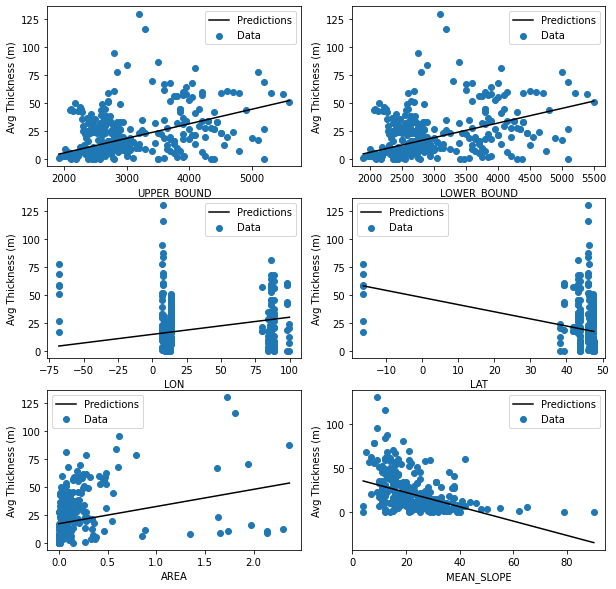

In [14]:
fig,ax=plt.subplots(3,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(3,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = linear_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

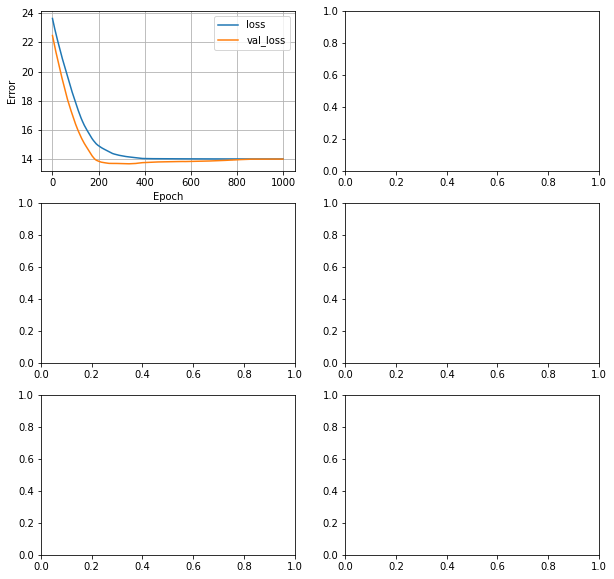

In [15]:
fig,ax=plt.subplots(3,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(3,2,i+1)
    plot_loss(linear_history[variable_name])
    ax.set_title(variable_name)

In [ ]:
# thiswillcrash()

# Linear regression with multiple inputs

In [ ]:
linear_model = build_linear_model(normalizer['ALL'])

history = linear_model.fit(
train_features, train_labels,        
   epochs=1000,
   verbose=0,
   validation_split = 0.2)

test_results["MULTI"] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

In [ ]:
plot_loss(history)

# DNN regression

## Define regression functions

In [ ]:
def build_dnn_model(norm):
    model = keras.Sequential([
              norm,
              layers.Dense(64, activation='relu'),
              layers.Dense(64, activation='relu'),
              layers.Dense(1) ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

def dnn_test_results(feature_name):
    dnn_test_results[feature_name] = dnn_model.evaluate(
        test_features[feature_name],
        test_labels, verbose=0)

In [ ]:
test_results = {}
dnn_model = {}
dnn_history = {}
dnn_results = {}

In [ ]:
variable_list = ("UPPER_BOUND","LOWER_BOUND","LON","LAT","AREA","MEAN_SLOPE")
for variable_name in variable_list:

    dnn_model[variable_name] = build_dnn_model(normalizer[variable_name])
    dnn_history[variable_name] = dnn_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=1000,
                                        verbose=0,
                                        validation_split = 0.2)
    dnn_results[variable_name] = dnn_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

dnn_results

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(3,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = dnn_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(3,2,i+1)
    plot_loss(dnn_history[variable_name])
    ax.set_title(variable_name)

# Full model

In [ ]:
dnn_full_model = build_dnn_model(normalizer['ALL'])

In [ ]:
%%time
history_full = dnn_full_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=1000)

In [ ]:
plot_loss(history_full)

In [ ]:
y = dnn_full_model.predict(test_features)
plt.plot(test_labels,y,'o')
plt.plot((0,150),(0,150),'-')
plt.xlabel('True Thickness (km**2)')
plt.ylabel('Model Thickness (km**2)')

In [ ]:
plt.subplots()
x = np.reshape(test_labels.values, (-1, 1)) # Training values in a n-by-1 array
pct_error = (x-y)/x
plt.hist(pct_error.flatten())
plt.xlabel('Percent Error')
plt.ylabel('Count')

In [ ]:
test_results["dnn_full_model"] = dnn_full_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results